In [9]:
import pandas as pd
import numpy as np
import re
import math
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report
from nltk.tokenize import TweetTokenizer

In [10]:
sample = pd.read_csv(r'C:\Users\ASUS\skripsi\sample_preprocessed.csv')

In [11]:
sample[sample['preprocessed'].isnull()]

,Unnamed: 0,date,link,username,tweet,like,retweet,reply,qrt,Sentimen,cleansing,normalization,stemmed,tokenized,filtered,preprocessed


In [12]:
sample['preprocessed'] = sample['preprocessed'].replace(np.nan, 'msib kerja rodi tidak layak')

In [13]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1411 non-null   int64 
 1   date           1411 non-null   object
 2   link           1411 non-null   object
 3   username       1411 non-null   object
 4   tweet          1411 non-null   object
 5   like           1411 non-null   int64 
 6   retweet        1411 non-null   int64 
 7   reply          1411 non-null   int64 
 8   qrt            1411 non-null   int64 
 9   Sentimen       1411 non-null   int64 
 10  cleansing      1410 non-null   object
 11  normalization  1410 non-null   object
 12  stemmed        1410 non-null   object
 13  tokenized      1411 non-null   object
 14  filtered       1411 non-null   object
 15  preprocessed   1411 non-null   object
dtypes: int64(6), object(10)
memory usage: 176.5+ KB


In [14]:
sample = sample.drop(['Unnamed: 0'], axis = 1)
sample

,date,link,username,tweet,like,retweet,reply,qrt,Sentimen,cleansing,normalization,stemmed,tokenized,filtered,preprocessed
0,2022-07-19 14:41:28,https://twitter.com/collegemenfess/status/1549...,collegemenfess,[cm] adakah kakak2 yg ikut msib angkatan sebel...,0,0,3,0,0,cm adakah kakak yg ikut msib angkatan sebelu...,cuma adakah kakak yang ikut msib angkatan se...,cuma ada kakak yang ikut msib angkat belum nya...,"['cuma', 'ada', 'kakak', 'yang', 'ikut', 'msib...","['kakak', 'msib', 'angkat', 'magang', 'studi',...",kakak msib angkat magang studi independen tia ...
1,2023-01-09 12:58:17,https://twitter.com/unnesmenfess/status/161243...,unnesmenfess,-ness maaf mau tanya disini ada mahasiswa smst...,1,0,0,0,0,ness maaf mau tanya disini ada mahasiswa smstr...,nes maaf mau tanya disini ada mahasiswa smstr ...,nes maaf mau tanya sini ada mahasiswa smstr ya...,"['nes', 'maaf', 'mau', 'tanya', 'sini', 'ada',...","['maaf', 'mahasiswa', 'smstr', 'msib']",maaf mahasiswa smstr msib
2,2022-07-20 02:12:31,https://twitter.com/YUPIEN_FESS/status/1549577...,YUPIEN_FESS,-upnjog masi bisa ga minta ttd untuk surat SPT...,0,0,1,0,0,upnjog masi bisa ga minta ttd untuk surat SPTJ...,upnjog masih bisa enggak meminta ttd untuk sur...,upnjog masih bisa enggak minta ttd untuk surat...,"['upnjog', 'masih', 'bisa', 'enggak', 'minta',...","['ttd', 'surat', 'sptjm', 'msib']",ttd surat sptjm msib
3,2022-12-29 14:43:18,https://twitter.com/bapakkusungjin/status/1608...,bapakkusungjin,anjir kok bisa ini kaprodi gatau apa2 soal MSIB😭,0,0,0,0,-1,anjir kok bisa ini kaprodi gatau apa soal MSI...,anjir kok bisa ini kaprodi enggak tau apa soa...,anjir kok bisa ini kaprodi enggak tau apa soal...,"['anjir', 'kok', 'bisa', 'ini', 'kaprodi', 'en...","['anjir', 'kaprodi', 'tau', 'msib', 'wajah', '...",anjir kaprodi tau msib wajah menang keras
4,2022-07-21 05:09:43,https://twitter.com/wonderkid911/status/154998...,wonderkid911,beberapa minggu lalu ada mahasiwa yang selalu ...,0,0,1,0,1,beberapa minggu lalu ada mahasiwa yang selalu ...,beberapa minggu lalu ada mahasiwa yang selalu ...,beberapa minggu lalu ada mahasiwa yang selalu ...,"['beberapa', 'minggu', 'lalu', 'ada', 'mahasiw...","['minggu', 'mahasiwa', 'chat', 'konsultasi', '...",minggu mahasiwa chat konsultasi cv program msi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2022-09-15 17:17:58,https://twitter.com/saapraiiiabc/status/157046...,saapraiiiabc,intern di lembaga swasta fee nya ngalahin di M...,0,0,0,0,0,intern di lembaga swasta fee nya ngalahin di M...,intern di lembaga swasta fe nya mengalahkan di...,intern di lembaga swasta fe nya kalah di msib ...,"['intern', 'di', 'lembaga', 'swasta', 'fe', 'n...","['intern', 'lembaga', 'swasta', 'fe', 'kalah',...",intern lembaga swasta fe kalah msib anjir cuma...
1407,2023-01-04 16:07:01,https://twitter.com/yenireca1/status/161066913...,yenireca1,daily report \n4/01/2023\n\n1. bikin vision bo...,1,0,2,0,0,daily report bikin vision board k...,daily report bikin vision board k...,daily report bikin vision board dua siapin aff...,"['daily', 'report', 'bikin', 'vision', 'board'...","['daily', 'report', 'bikin', 'vision', 'board'...",daily report bikin vision board siapin affilia...
1408,2022-12-18 01:44:50,https://twitter.com/ipb_menfess/status/1604291...,ipb_menfess,Punten yg daftar msib cv nya harus ats friendl...,0,0,1,0,0,Punten yg daftar msib cv nya harus ats friendl...,Punten yang daftar msib cv nya harus atas frie...,punten yang daftar msib cv nya harus atas frie...,"['punten', 'yang', 'daftar', 'msib', 'cv', 'ny...","['punten', 'daftar', 'msib', 'cv', 'friendly']",punten daftar msib cv friendly
1409,2022-07-15 16:02:38,https://twitter.com/collegemenfess/status/1547...,collegemenfess,"[cm] sender 3L, lemah letih lesu menanti feedb...",14,0,6,0,0,cm sender L lemah letih lesu menanti feedba...,cuma sender L lemah letih lesu menanti feed...,cuma sender l lemah letih lesu nanti feedback ...,"['cuma', 'sender', 'l', 'lemah', 'letih', 'les...","['send

In [15]:
# sample.to_csv(r'C:\Users\ASUS\skripsi\sample_preprocessed.csv')

In [16]:
sample_model = sample.loc[:, ['link','preprocessed', 'Sentimen']]

# PROSES TF IDF

In [17]:
# Tokenisasi

def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

In [18]:
# Pembobotan TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1)
)

In [19]:
feature_matrix = vectorizer.fit_transform(sample_model['preprocessed'])
document_term_matrix = pd.DataFrame(data=feature_matrix.toarray(), columns=vectorizer.get_feature_names())
# document_term_matrix.to_excel(r'C:\Users\ASUS\skripsi\tfidf_matrix.xlsx', index = False)
document_term_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,3,a,aaaaaaaaaaaaanjing,aaaak,aaargh,aarrgh,ab,abang,abdi,abdillah,...,yuk,yukz,yulje,yupi,zaky,zamisyak,zen,zenius,zoom,zoomnya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
features_used = document_term_matrix[['a', 'aaaaaaaaaaaaanjing', 'aaargh', 'aarrgh', 'ab', 'abang', 'abdillah', 'absen', 'abt', 'abu', 'ac', 'academy', 'acara', 'accepted', 'account', 'achievment', 'actually', 'adbis', 'admin', 'administrasi', 'adminnya', 'ado', 'advance', 'advice', 'advo', 'advokasi', 'aenya', 'affiliate', 'afni', 'agaknua', 'agraria', 'agustus', 'ahli', 'ahmad', 'ai', 'aib', 'aidah', 'aih', 'ain', 'aing', 'air', 'ajaib', 'ajak', 'ajang', 'ajar', 'aju', 'akademik', 'akademis', 'akademisi', 'akal', 'akang', 'akt', 'aktif', 'aktifitas', 'aktivitas', 'akuin', 'akun', 'akuntansi', 'akwkkawk', 'al', 'alaikum', 'alam', 'alami', 'alamin', 'alas', 'album', 'alesannya', 'alfamidi', 'alghifari', 'alhamdulilah', 'alhamdulillah', 'alhasil', 'alias', 'alih', 'allah', 'allowed', 'alumne', 'alumni', 'alur', 'always', 'aman', 'ambang', 'ambil', 'ameylia', 'amik', 'amin', 'amp', 'amplop', 'ampu', 'an', 'ana', 'anak', 'analisis', 'anas', 'and', 'andai', 'android', 'angka', 'angkat', 'anjeng', 'anjg', 'anjing', 'anjir', 'annyone', 'another', 'antartika', 'antra', 'antusias', 'anxiety', 'any', 'anything', 'anyway', 'apadeh', 'apakabar', 'apdet', 'apiary', 'aplikasi', 'apply', 'appreciation', 'appreticenship', 'apr', 'apresiasi', 'april', 'aprilia', 'arah', 'are', 'arek', 'argh', 'arti', 'arya', 'as', 'asa', 'asdos', 'asesmen', 'asih', 'asik', 'asing', 'askrl', 'asli', 'aspirasi', 'assalamu', 'assesment', 'astaghfirullah', 'astra', 'asu', 'at', 'atauga', 'ati', 'ato', 'atr', 'atsnya', 'atur', 'auditorium', 'aug', 'auto', 'autocad', 'available', 'aware', 'awesome', 'awokawok', 'ayo', 'b', 'baba', 'babak', 'babi', 'baca', 'bacain', 'backup', 'badan', 'badut', 'bae', 'bagen', 'bagus', 'bahagia', 'bahak', 'bahan', 'bahas', 'bahasa', 'baki', 'bakti', 'bal', 'bala', 'balas', 'baleek', 'balesan', 'balikin', 'banding', 'bandung', 'banfu', 'bang', 'banget', 'bangga', 'bangkit', 'bangkrut', 'bangsa', 'bangsat', 'banh', 'bank', 'bantai', 'bantu', 'bantuin', 'bantul', 'banyaknha', 'bara', 'barang', 'barangkali', 'barata', 'bareng', 'barusan', 'bas', 'basah', 'basically', 'batal', 'batalin', 'batas', 'batch', 'batin', 'bawa', 'bayar', 'bbh', 'be', 'beasiswa', 'beban', 'bebas', 'because', 'becus', 'beda', 'been', 'begimana', 'bego', 'being', 'bekal', 'bekerjasama', 'bela', 'beli', 'beliau', 'believe', 'bem', 'benefit', 'benerin', 'bentar', 'bentrok', 'bentuk', 'berangkat', 'berani', 'beranta', 'berat', 'beres', 'beristighfar', 'berita', 'berkas', 'berkat', 'bersertifikas', 'bersetifikat', 'bersin', 'bes', 'besok', 'best', 'betah', 'better', 'between', 'bgos', 'bgst', 'bgts', 'bhd', 'bi', 'biar', 'biaya', 'bib', 'bicara', 'bidang', 'bijak', 'bikaus', 'bikin', 'bilang', 'billa', 'bimawa', 'bimbang', 'bimbing', 'binar', 'binatang', 'bineka', 'bing', 'bingung', 'bingungin', 'bintang', 'bio', 'biro', 'birokrasi', 'biru', 'bisain', 'bismillah', 'bismillahhhhhhy', 'bisnis', 'bitlabs', 'bkl', 'blacklist', 'blgnya', 'blkg', 'blokir', 'board', 'boarding', 'bocil', 'bolah', 'bolak', 'book', 'bootcamp', 'boothcamp', 'bot', 'bpjs', 'bpn', 'brand', 'bri', 'brimo', 'brkaitan', 'bromo', 'bsi', 'btw', 'bu', 'budak', 'budaya', 'budget', 'budrek', 'buka', 'bukti', 'buku', 'bulat', 'bully', 'bumn', 'bunga', 'bur', 'bursa', 'buru', 'bus', 'busa', 'buset', 'but', 'butuh', 'buzzer', 'cabut', 'cah', 'cair', 'cal', 'calling', 'calon', 'campus', 'can', 'cancel', 'canda', 'cantik', 'cap', 'capai', 'capek', 'capital', 'career', 'cari', 'case', 'catat', 'cbt', 'cdc', 'ce', 'cek', 'cemberut', 'cenderung', 'centang', 'center', 'cepat', 'cerah', 'cerita', 'ceroboh', 'certified', 'cewek', 'cha', 'challenging', 'channel', 'chat', 'chatan', 'check', 'cheer', 'cias', 'ciater', 'cinta', 'circle', 'cirebon', 'cita', 'cium', 'ckitu', 'classes', 'clear', 'click', 'clio', 'closing', 'clueles', 'cmiiw', 'coal', 'coba', 'cocok', 'code', 'cok', 'colle', 'coming', 'communication', 'comp', 'company', 'competition', 'computer', 'congratulations', 'consultancy', 'consulting', 'cont', 'contoh', 'conversation', 'convert', 'copas', 'copywriting', 'corner', 'corp', 'corporate', 'counting', 'course', 'cover', 'cowok', 'cp', 'creative', 'crew', 'cuk', 'cuman', 'cung', 'curang', 'curgia', 'curhaaat', 'curhat', 'curhatnya', 'curiga', 'cus', 'cushio', 'cut', 'cuti', 'cuy', 'cv', 'cvku', 'cvnya', 'cybersecutiry', 'cycle', 'dada', 'daerah', 'daftar', 'daftarin', 'daftat', 'dafyar', 'dagdigdug', 'dah', 'daily', 'dalem', 'damn', 'dampak', 'dana', 'dapetnya', 'dar', 'darah', 'darimana', 'darmajaya', 'darurat', 'data', 'date', 'day', 'daya', 'deadlinennya', 'deadlinenya', 'deg', 'degan', 'deh', 'dekan', 'denda', 'dengar', 'departemen', 'derita', 'des', 'desa', 'desember', 'deserved', 'desk', 'desperate', 'develop', 'developer', 'developing', 'development', 'dftar', 'dftr', 'dha', 'diac', 'dianggep', 'diapus', 'dibales', 'dibantuin', 'dibarengin', 'dibayarin', 'diberitahukan', 'dibicarain', 'diblacklist', 'dibolehin', 'dibuatin', 'dibutuhin', 'dichat', 'dicoding', 'dicutof', 'didik', 'didnt', 'didownload', 'diextend', 'digangguin', 'digital', 'digitalent', 'digoto', 'diharusin', 'diikutin', 'diikutsertakan', 'dijanjiin', 'dijelasin', 'dijulidin', 'dik', 'dikit', 'dikomunikasiin', 'dikosan', 'dikosongin', 'dikti', 'diktiristek', 'dikumpulin', 'dilema', 'dimasing', 'dinas', 'dingin', 'diperpanjaang', 'dipersimple', 'diploma', 'dirayain', 'diread', 'direchat', 'direject', 'direktorat', 'direktur', 'dirjen', 'disampein', 'disiapin', 'diskusi', 'dissukcapil', 'disubmit', 'ditandatangani', 'ditanyain', 'ditempatin', 'ditjen', 'dituker', 'dituntasin', 'diupload', 'divisi', 'dlnya', 'dluan', 'dm', 'doa', 'doain', 'doang', 'dokter', 'dokumen', 'dom', 'done', 'dosbingku', 'dosen', 'down', 'download', 'dpl', 'dpr', 'drakoran', 'drama', 'dreamies', 'drip', 'drop', 'dstar', 'duduk', 'duh', 'duid', 'duit', 'dukung', 'duluan', 'dumb', 'dump', 'dun', 'dunia', 'durasi', 'durung', 'e', 'early', 'easily', 'edisi', 'education', 'eel', 'efek', 'effort', 'efisien', 'egois', 'eh', 'eiruueriegiwfogfbewortgrurgiurewiefu', 'either', 'ekonomi', 'ekspektasi', 'ekspor', 'ekspresi', 'el', 'elburdah', 'eligible', 'emaik', 'email', 'embus', 'emosi', 'emot', 'empet', 'enak', 'enake', 'end', 'eneg', 'energi', 'engah', 'enggan', 'engganya', 'engineer', 'engineering', 'enih', 'enlighten', 'entar', 'entitas', 'ept', 'erick', 'error', 'erti', 'es', 'esp', 'essai', 'euy', 'evaluasi', 'evaluation', 'everyone', 'everytime', 'excited', 'exp', 'expand', 'expect', 'expectation', 'expecting', 'experience', 'ey', 'facilku', 'facilnya', 'fakultas', 'falkor', 'fapet', 'fasilitas', 'favorit', 'fb', 'fe', 'feb', 'februari', 'feedback', 'feeling', 'fermentasi', 'fes', 'festival', 'fgd', 'fh', 'fhci', 'fia', 'fifin', 'fikom', 'fiks', 'file', 'filter', 'final', 'fine', 'fisip', 'fitur', 'fix', 'fkip', 'flagship', 'fo', 'fokus', 'follow', 'fomo', 'food', 'for', 'form', 'format', 'formulir', 'forum', 'forward', 'foto', 'fren', 'friendly', 'from', 'fsm', 'ful', 'fulltime', 'fun', 'future', 'gaaaak', 'gabole', 'gabung', 'gadapet', 'gadpt', 'gaes', 'gagal', 'gaikut', 'gairah', 'gais', 'gajadi', 'gaji', 'gakjelas', 'gaksi', 'galau', 'gali', 'gang', 'ganggu', 'ganjil', 'ganteng', 'ganti', 'gantung', 'gantungin', 'gapaham', 'gapapa', 'gaperlu', 'gara', 'gara-gara', 'garage', 'gars', 'gas', 'gatauah', 'gatuh', 'gausaah', 'gd', 'ge', 'gede', 'gedek', 'gedung', 'gegara', 'gelar', 'gelo', 'gembira', 'genap', 'generasi', 'gengs', 'gengsi', 'gerak', 'gerbang', 'gerilya', 'ges', 'geser', 'getcontact', 'gform', 'giat', 'gift', 'gila', 'gilang', 'giselle', 'gits', 'give', 'gjls', 'global', 'gmbr', 'gmpang', 'god', 'going', 'gon', 'good', 'goodbye', 'goodluck', 'google', 'got', 'gp', 'grace', 'graduation', 'gramedia', 'grammar', 'gratis', 'greatedu', 'group', 'growatparagon', 'growth', 'grup', 'gua', 'gue', 'gues', 'gugur', 'guling', 'gumoh', 'gunain', 'guru', 'guys', 'gweh', 'h', 'habis', 'hack', 'had', 'hadap', 'hadir', 'hah', 'hahaha', 'hahahha', 'hai', 'hajar', 'hak', 'hakka', 'halaman', 'halang', 'halo', 'han', 'handle', 'hanjur', 'happines', 'happy', 'hapus', 'hara', 'harap', 'harder', 'hardskil', 'harga', 'has', 'hashmicro', 'hasil', 'hasut', 'hataman', 'hate', 'hati', 'hayo', 'he', 'hebat', 'heh', 'hehe', 'hehehehe', 'heheheheh', 'hello', 'help', 'helpdesk', 'hemat', 'her', 'heran', 'heru', 'hey', 'hft', 'hi', 'hibur', 'hidup', 'hihi', 'hijau', 'hiks', 'hiksrot', 'hilal', 'hilang', 'himasta', 'himpun', 'hitam', 'hitung', 'hm', 'hmj', 'honor', 'hope', 'hopeles', 'hormat', 'hospitality', 'how', 'hp', 'hu', 'huaak', 'huawei', 'hubung', 'hubungin', 'hue', 'huehuehue', 'huft', 'huhu', 'huhuhu', 'huhuhuhuhuhu', 'human', 'huru', 'hustle', 'hv', 'hybrid', 'hype', 'i', 'ibadah', 'id', 'idak', 'identitas', 'idk', 'iduka', 'ig', 'ih', 'iib', 'iisma', 'ikhlas', 'iku', 'ikutab', 'ilkom', 'ilmu', 'ilpol', 'im', 'imajinasi', 'imissu', 'impi', 'implementasi', 'impulsif', 'inagurasi', 'include', 'ind', 'indak', 'inde', 'independen', 'independent', 'indikasi', 'indikator', 'indonesia', 'indonesians', 'industri', 'industry', 'info', 'infoin', 'informasi', 'informatika', 'information', 'inggris', 'inka', 'innovation', 'innovators', 'inovasi', 'input', 'insecure', 'insentif', 'inspect', 'inspiratif', 'inspiring', 'instagram', 'instal', 'installasi', 'instansi', 'institusi', 'insyaallah', 'interact', 'intern', 'internal', 'internasional', 'international', 'internet', 'internship', 'interview', 'inti', 'intv', 'ip', 'ipad', 'ipeka', 'ipk', 'ir', 'ira', 'iri', 'is', 'iseng', 'isi', 'istikamah', 'istirahat', 'isu', 'isyarat', 'itk', 'its', 'itscareercenter', 'itutuh', 'iv', 'iya', 'izin', 'jabanin', 'jabat', 'jadwal', 'jaga', 'jago', 'jahat', 'jajan', 'jakarta', 'jalan', 'jam', 'jangka', 'janji', 'jantung', 'januari', 'jaoh', 'jarang', 'jaring', 'jasa', 'jasmani', 'jatohnya', 'jatuh', 'jawat', 'jaya', 'jdnya', 'jebal', 'jebol', 'jebul', 'jedag', 'jedug', 'jelasin', 'jelek', 'jembatan', 'jempol', 'jenderal', 'jenis', 'jenjang', 'jepit', 'jerapah', 'jiah', 'jmblo', 'jobdesk', 'jogja', 
                                     'join', 'journey', 'jrusanku', 'jual', 'juang', 'judul', 'jujur', 'jujurly', 'jul', 'juli', 'july', 'jumat', 'jun', 'juni', 'jurnal', 'jurus', 'just', 'juta', 'kab', 'kabar', 'kabul', 'kabupaten', 'kabur', 'kacamata', 'kacau', 'kacaw', 'kadaluwarsa', 'kadang', 'kader', 'kagak', 'kait', 'kajur', 'kak', 'kakak', 'kaki', 'kalah', 'kalang', 'kalender', 'kali', 'kalibr', 'kalo', 'kamjar', 'kampus', 'kampusmerdeka', 'kanan', 'kang', 'kantor', 'kapaaan', 'kapai', 'kapastitas', 'kaprodi', 'karier', 'karir', 'kartu', 'karuan', 'karyawan', 'karyawannya', 'kas', 'kasih', 'kategori', 'kating', 'katingku', 'kau', 'kawands', 'kaya', 'kayak', 'kbm', 'kebhinekaan', 'kebhinekaannya', 'kebun', 'keburu', 'kecantol', 'kecewa', 'kedip', 'keep', 'kejar', 'kelar', 'kelarin', 'kelas', 'kelen', 'kelompok', 'keluarga', 'keluh', 'kelulus', 'kemari', 'kemarin', 'kembang', 'kemdikbud', 'kemdikbudristek', 'kemenag', 'kemendikbud', 'kemendikbudristek', 'kemenkeu', 'kemensetneg', 'ken', 'kena', 'kenal', 'kenan', 'kenang', 'kencang', 'kendala', 'kendara', 'kepala', 'kepastiaan', 'kepo', 'keras', 'keren', 'keringat', 'kerja', 'kerjasama', 'kertosentono', 'kesan', 'kesana', 'kesel', 'kesini', 'kesma', 'ketat', 'ketemu', 'ketenagakerjaan', 'keteter', 'ketik', 'ketompo', 'ketrima', 'ketua', 'ketuk', 'keupdate', 'kewalahan', 'kg', 'khanif', 'khosasih', 'khusus', 'kilau', 'kimia', 'kirim', 'kiro', 'kisah', 'kisi', 'kkn', 'kknt', 'klaim', 'klarifikasi', 'klik', 'kls', 'kmmi', 'knapa', 'know', 'koar', 'kolaborasi', 'kolega', 'kolektif', 'komen', 'kominfo', 'komisi', 'komitmen', 'komp', 'kompas', 'kompeten', 'kompetensi', 'komputer', 'komunikasi', 'komunitas', 'kondisi', 'konek', 'koneksi', 'konfirmasi', 'konsekuensi', 'konsiltasi', 'konsisten', 'konsolidasi', 'konsultasi', 'kontak', 'konteks', 'kontrak', 'konver', 'konvers', 'konversi', 'konyol', 'koor', 'koordinasi', 'koordinator', 'koprodi', 'korban', 'kos', 'kosan', 'kosong', 'kost', 'kota', 'kotak', 'kouta', 'koyo', 'kp', 'kredit', 'krim', 'kriteria', 'krs', 'krsan', 'krsnya', 'krusial', 'ktar', 'ktir', 'ktp', 'ku', 'kualitas', 'kuasa', 'kuat', 'kucing', 'kudu', 'kui', 'kuisoner', 'kuliah', 'kulit', 'kumpulin', 'kunjung', 'kuota', 'kursi', 'kusut', 'kutu', 'kv', 'l', 'laaah', 'label', 'lage', 'lagipula', 'lai', 'laksana', 'laku', 'laman', 'lamar', 'lambai', 'lambat', 'lampir', 'lancar', 'langgan', 'langgar', 'langkah', 'langsung', 'lanjur', 'lantai', 'lapakjpwta', 'lapang', 'lapor', 'laptop', 'larang', 'last', 'lastday', 'lawak', 'lawan', 'layak', 'layar', 'least', 'lebar', 'left', 'lega', 'lelah', 'lemah', 'lembaga', 'lembar', 'lembur', 'lemes', 'lempar', 'lengan', 'lengkap', 'lengkapin', 'lepas', 'lese', 'lesu', 'letih', 'lets', 'letsgo', 'level', 'lho', 'lian', 'libur', 'lihat', 'lika', 'like', 'liku', 'lilin', 'line', 'linear', 'lingkar', 'lingkung', 'linjur', 'link', 'linked', 'linkedin', 'linknya', 'lintas', 'lipat', 'liput', 'lirik', 'list', 'listrik', 'literally', 'live', 'lo', 'loa', 'loading', 'loadingnya', 'lock', 'lodging', 'log', 'logika', 'login', 'logistik', 'loh', 'lok', 'lokasi', 'lolos', 'lomba', 'looke', 'lorong', 'lose', 'lower', 'lowong', 'lpdp', 'lspr', 'lu', 'luang', 'luas', 'luck', 'lucu', 'lulus', 'lulussidang', 'lumayan', 'lunas', 'luncur', 'lupa', 'lur', 'luring', 'lutut', 'maaf', 'maaksi', 'made', 'mag', 'magang', 'maganga', 'magangmerdeka', 'mageran', 'magic', 'mah', 'maha', 'mahasiswa', 'mahasiswi', 'mahasiwa', 'mail', 'main', 'maintenance', 'maisng', 'mak', 'makan', 'makasiih', 'makassiih', 'maks', 'maksimal', 'maksud', 'makul', 'malaikat', 'malam', 'malas', 'man', 'management', 'managementnya', 'manajemen', 'mandi', 'mandiri', 'manfaat', 'mangkanya', 'manifesting', 'mantab', 'mantap', 'mantappu', 'mantau', 'mantengin', 'manual', 'manusia', 'mar', 'marah', 'maret', 'marketing', 'markicob', 'mas', 'masak', 'masjid', 'massal', 'mastiin', 'masuk', 'mata', 'matahari', 'matematika', 'materi', 'mati', 'matkul', 'matkulku', 'matkulnya', 'mauarah', 'max', 'maxy', 'maya', 'mayoritas', 'mbak', 'mbkm', 'mbkmnya', 'me', 'meanwhile', 'medan', 'media', 'meet', 'meeting', 'mei', 'mejam', 'mekar', 'melu', 'memelas', 'memgambil', 'memnuhi', 'menang', 'mending', 'menfes', 'mengepoi', 'mengikhlaskn', 'mengsedih', 'mengupload', 'menit', 'mental', 'menteri', 'mentok', 'mentor', 'mentoring', 'menuhin', 'mepet', 'merah', 'merdeka', 'message', 'mesti', 'metaverse', 'mgerjain', 'mhs', 'mhsw', 'mib', 'mice', 'microsoft', 'mikir', 'milik', 'mimpi', 'min', 'minat', 'minder', 'minergi', 'minggu', 'minimal', 'ministry', 'minus', 'miris', 'misuh', 'mitra', 'mix', 'mixue', 'mjb', 'mnj', 'mobile', 'mobilisasi', 'mobitekno', 'modal', 'modul', 'moga', 'mohon', 'mojadiap', 'momen', 'momentum', 'month', 'moots', 'more', 'mostly', 'motor', 'mou', 'msbi', 'msib', 'msibnya', 'mtual', 'mu', 'mubazir', 'much', 'mud', 'muda', 'mudah', 'muhammadiyah', 'muhsin', 'mujiibassailiin', 'muka', 'mules', 'multi', 'multinasional', 'mulu', 'mulut', 'mumet', 'mumpuni', 'muncul', 'mundur', 'muntah', 'murah', 'mustahil', 'mutah', 'muter', 'muts', 'mutualan', 'my', 'n', 'nabrak', 'nadiem', 'nafas', 'nagih', 'nak', 'nama', 'nang', 'nanggung', 'nanyain', 'nanyo', 'napas', 'nar', 'narahubung', 'narasumber', 'naruh', 'nasib', 'nasional', 'national', 'nay', 'nazar', 'ndadak', 'ndaniyo', 'ndeer', 'nder', 'nebar', 'necessary', 'need', 'needs', 'negara', 'negative', 'negeri', 'nendo', 'neng', 'net', 'netral', 'news', 'next', 'nf', 'ng', 'ngab', 'ngabari', 'ngabarin', 'ngabisin', 'ngadepin', 'ngajuinnya', 'ngalamin', 'ngambil', 'ngang', 'nganggep', 'nganggur', 'ngangkat', 'ngantuk', 'nge', 'ngecancel', 'ngeceknya', 'ngedown', 'ngefasil', 'ngeghosting', 'ngehubungin', 'ngekos', 'ngekosongin', 'ngelamar', 'ngelatih', 'ngeluh', 'ngerasin', 'ngerelain', 'ngeri', 'ngeringanin', 'ngerjain', 'ngerjainnya', 'ngetweet', 'nggada', 'ngganya', 'nginput', 'ngisi', 'ngjk', 'ngoding', 'ngong', 'ngontrak', 'nguju', 'ngulang', 'ngumpulin', 'ngundurin', 'niat', 'nic', 'nih', 'nila', 'nilai', 'nimbrung', 'nip', 'nitip', 'no', 'nolak', 'nominal', 'nomor', 'non', 'normal', 'notabene', 'note', 'nothing', 'notice', 'notif', 'notifikasi', 'now', 'nrima', 'nugas', 'numpang', 'numpuk', 'nunda', 'nur', 'nurse', 'nutrisi', 'nyabang', 'nyala', 'nyambi', 'nyamperin', 'nyantol', 'nyata', 'nyebutinnya', 'nyepelein', 'nyerah', 'nyia', 'nyiain', 'nyiapin', 'nyokap', 'nyusun', 'oalaaah', 'obviously', 'oeluangnya', 'of', 'ofc', 'ofering', 'offense', 'offering', 'offeringnya', 'official', 'offline', 'oflen', 'ohiya', 'oikawa', 'ojan', 'ojk', 'okay', 'oke', 'olah', 'omaygat', 'omg', 'omong', 'on', 'onboarding', 'onlen', 'online', 'oot', 'open', 'oper', 'opo', 'opportunities', 'opportunity', 'optimal', 'optimis', 'orang', 'organisasi', 'orientasi', 'oriented', 'other', 'otomatis', 'otot', 'otw', 'our', 'out', 'outbond', 'overthinking', 'ovt', 'owalah', 'p', 'pacar', 'pacil', 'padahaal', 'padat', 'pagi', 'pah', 'paham', 'paid', 'paitnya', 'paji', 'pakai', 'paket', 'paksa', 'paku', 'panah', 'panas', 'panggil', 'panik', 'panitia', 'pantau', 'pantesan', 'papa', 'paragon', 'parah', 'part', 'participated', 'partisipasi', 'partner', 'parttime', 'pas', 'pasar', 'pasport', 'pasrah', 'passcode', 'pasuk', 'patah', 'pc', 'pddikti', 'peduli', 'pegang', 'peluang', 'peluk', 'pemberitahuan', 'pend', 'pendaftran', 'pengaruh', 'pengenin', 'pengin', 'pening', 'penuh', 'penyampain', 'perah', 'perang', 'percaya', 'perform', 'perhati', 'perihal', 'periksa', 'perintah', 'periode', 'perjunganya', 'perkara', 'permaneker', 'permisi', 'persada', 'pertanggungjawaban', 'pertimbangin', 'perusahaanya', 'pesimis', 'pesta', 'peta', 'petinggi', 'petisi', 'pgpaud', 'phk', 'php', 'phpin', 'pic', 'pict', 'pido', 'pikir', 'pilar', 'pilih', 'pilihin', 'pindah', 'pintar', 'pinternya', 'pirsa', 'pisah', 'piye', 'pjnya', 'pkj', 'pkl', 'plan', 'planning', 'platform', 'please', 'plin', 'plis', 'plise', 'plns', 'pls', 'plt', 'plus', 'plz', 'pm', 'pmmb', 'pnj', 'pntolan', 'point', 'pokok', 'polinema', 'politik', 'ponsel', 'populasi', 'porto', 'posisi', 'positif', 'post', 'postingan', 'potensi', 'potong', 'pov', 'power', 'ppk', 'ppm', 'ppsdm', 'pr', 'praktik', 'praktikum', 'praktisi', 'prambanan', 'prasetyo', 'praying', 'pre', 'prediksi', 'prefer', 'prepare', 'presentasi', 'presiden', 'prestasi', 'pria', 'pribadi', 'pringgodani', 'printilan', 'prioritas', 'privat', 'private', 'pro', 'prodi', 'prodiku', 'prodinya', 'product', 'production', 'produktif', 'prof', 'professional', 'profil', 'progam', 'program', 'progres', 'project', 'projek', 'proses', 'proud', 'provinsi', 'proyek', 'prshbtn', 'psikologi', 'psikotest', 'pt', 'ptg', 'puasa', 'public', 'publikasi', 'pudir', 'puji', 'pulang', 'pulau', 'puluh', 'punteeen', 'punten', 'pupr', 'pupuk', 'pus', 'pusat', 'pusban', 'pusing', 'puska', 'putar', 'putih', 'putra', 'putri', 'putus', 'pw', 'qrt', 'quit', 'quotanya', 'quran', 'r', 'rabu', 'rada', 'ragu', 'raih', 'raisha', 'raishawdnt', 'rajin', 'rame', 'rancang', 'rang', 'rangin', 'rangkai', 'rangkap', 'rangkum', 'rantau', 'rapat', 'rapihin', 'rasai', 'ratus', 'rau', 'reach', 'react', 'read', 'ready', 'real', 'realis', 'realisasi', 'really', 'reason', 'rebah', 'recap', 'referensi', 'refused', 'regional', 'regis', 'regist', 'register', 'registration', 'regular', 'regulasi', 'reguler', 'rejected', 'rejecting', 'rek', 'rekan', 'rekendasi', 'rekening', 'rekognisi', 'rekomen', 'rekomendasi', 'rekomenin', 'rekrut', 'rektor', 'rela', 'relasi', 'relevan', 'remarked', 'remember', 'remote', 'rencana', 'renung', 'rep', 'reply', 'report', 'repost', 'repot', 'request', 'rese', 'research', 'resmi', 'respon', 'respons', 'responsif', 'restart', 'restu', 'retweet', 'review', 'reviewnya', 'revou', 'reza', 'rezeki', 'ri', 'ribet', 'ribu', 'ric', 'richy', 'ride', 'right', 'ringan', 'ringkas', 'riset', 'ristek', 'risza', 'riweh', 'riweuh', 'robotics', 'ruang', 'rudy', 'rugi', 'rumah', 'rumpun', 'rupa', 'sabar', 'sabtu', 'sad', 'sadar', 'safety', 'saftar', 'sahabat', 'saham', 'saking', 'sakit', 'saksi', 'saku', 
                                    'salah', 'salam', 'salty', 'sambel', 'sambi', 'sambung', 'sambut', 'samsek', 'sangka', 'santai', 'sanusi', 'sapa', 'sapi', 'saran', 'sarasehan', 'sardo', 'sarjana', 'sasar', 'sat', 'saturday', 'save', 'sayang', 'sbmptn', 'sbnrnya', 'scholarship', 'scm', 'screening', 'scrol', 'sd', 'sdm', 'sdn', 'sdngkan', 'sdr', 'seaqil', 'search', 'sebar', 'sebel', 'sebnya', 'section', 'sedia', 'sedih', 'segan', 'sehat', 'sekarg', 'sekian', 'sekira', 'sekjen', 'sekolah', 'sekre', 'sektor', 'selamat', 'selasa', 'seleksi', 'selenggara', 'selesai', 'self', 'seliwer', 'sem', 'semalem', 'semangaat', 'semangat', 'semangatin', 'semanggaat', 'semarang', 'sembuh', 'semester', 'semhas', 'seminar', 'sempro', 'semrawut', 'sems', 'semster', 'semt', 'senang', 'send', 'sender', 'sengaja', 'senin', 'senyum', 'sepede', 'sepenuh', 'sepi', 'sept', 'september', 'seragam', 'serang', 'seringai', 'serius', 'sertif', 'sertifikasi', 'sertifikat', 'seru', 'server', 'servernya', 'sesak', 'sesal', 'sesi', 'session', 'sesuai', 'sesuaiin', 'set', 'sh', 'shalu', 'share', 'sharing', 'shock', 'shope', 'showcase', 'si', 'sia', 'siang', 'siapin', 'siasat', 'sib', 'sibuk', 'sidang', 'siddiq', 'sign', 'signed', 'sih', 'siin', 'sikadu', 'sila', 'silang', 'siluet', 'simak', 'simul', 'simulasi', 'sinarm', 'sinkron', 'sinyal', 'sip', 'sipu', 'sisa', 'sisi', 'sistem', 'sit', 'sitiaisyah', 'situ', 'situasi', 'skadar', 'skema', 'skeptis', 'skil', 'skingame', 'skip', 'skripshit', 'skripsi', 'skripsweet', 'skrisian', 'sks', 'sksnya', 'sley', 'slnjtnya', 'slot', 'slowrespon', 'smart', 'sme', 'smes', 'smester', 'smk', 'smst', 'smstr', 'smt', 'smuanya', 'sngat', 'soalmya', 'sob', 'sobat', 'softskil', 'soialisasi', 'sok', 'solo', 'solopos', 'solusi', 'sombong', 'someone', 'soon', 'sore', 'sorry', 'sosialisasi', 'sosio', 'sosiometri', 'sosmed', 'sound', 'sowry', 'spam', 'spatial', 'speaker', 'speaking', 'specta', 'spesifik', 'spil', 'spiral', 'spjtm', 'sponsor', 'spreadsheets', 'sprtinya', 'sptjm', 'sptjmnya', 'sptmj', 'sr', 'start', 'startup', 'statement', 'status', 'stauku', 'stechoq', 'stil', 'stop', 'stori', 'story', 'stres', 'students', 'studi', 'study', 'stupen', 'suasana', 'sub', 'submit', 'subsidi', 'succes', 'such', 'sucks', 'suhu', 'sujud', 'suka', 'sukses', 'sulit', 'sumatera', 'sumber', 'sumpa', 'sumpah', 'sungguh', 'super', 'supportive', 'supportnya', 'sur', 'surabaya', 'surat', 'surbin', 'suruh', 'survei', 'survey', 'survive', 'susah', 'suskses', 'sv', 'sw', 'swasta', 'swipe', 'switch', 'syafira', 'syarat', 'system', 'syukur', 't', 'ta', 'tabung', 'tag', 'tahan', 'tahap', 'tahi', 'takdir', 'take', 'taking', 'takut', 'talenta', 'talk', 'tanah', 'tanda', 'tandatangani', 'tangan', 'tanggal', 'tanggung', 'tangsel', 'tani', 'tanyatanya', 'tara', 'tarik', 'tata', 'tau', 'taut', 'tawar', 'tb', 'tbh', 'tbk', 'tbtb', 'teach', 'tebal', 'tech', 'technology', 'technopark', 'tegang', 'teh', 'teknik', 'teknologi', 'tel', 'telat', 'tele', 'telegram', 'telek', 'telepon', 'telkom', 'telkomsel', 'telutizen', 'telyu', 'tema', 'teman', 'tematik', 'tembak', 'tembus', 'tembusin', 'temenku', 'template', 'templatenya', 'tempuh', 'temu', 'tenaga', 'tenang', 'tengkorak', 'teori', 'ter', 'tera', 'terampil', 'terang', 'terbit', 'terdahululuku', 'terima', 'terimakasih', 'terjun', 'terkadang', 'termin', 'terna', 'ternyta', 'tertawa', 'tes', 'test', 'testimoni', 'testimoninya', 'teteh', 'textbook', 'tf', 'thank', 'thanks', 'thanku', 'thankyou', 'the', 'theo', 'theory', 'there', 'things', 'thinking', 'this', 'thohir', 'thread', 'thx', 'ti', 'tia', 'tidur', 'tiket', 'tiktok', 'tikus', 'tim', 'timbang', 'time', 'timeline', 'timelinenya', 'timer', 'timgerilya', 'timingnya', 'tindak', 'tinggal', 'tingkat', 'tips', 'tipu', 'titipin', 'tjahjanto', 'tkt', 'tmi', 'tmnan', 'tmnku', 'today', 'toefl', 'toeicku', 'tolak', 'tombol', 'tonton', 'topik', 'total', 'totalitas', 'tpt', 'tq', 'track', 'tragedi', 'trainer', 'transfer', 'transkip', 'transkrip', 'translate', 'transparansi', 'transportasi', 'tratap', 'trauma', 'tread', 'trend', 'tribe', 'tricks', 'trimakasi', 'trisakti', 'tros', 'trust', 'ttd', 'ttpi', 'tua', 'tubes', 'tugas', 'tuh', 'tuhaaaan', 'tuhan', 'tuju', 'tukar', 'tulang', 'tulis', 'tumpuk', 'tunduk', 'tunggu', 'turun', 'tutor', 'tutup', 'tv', 'tweet', 'twibbon', 'twibbonnya', 'twitter', 'twt', 'typo', 'tysm', 'uad', 'uaf', 'uang', 'uas', 'ub', 'ubah', 'udaaah', 'udb', 'ueue', 'ug', 'ugj', 'ugm', 'ui', 'uix', 'uji', 'ujung', 'ukdw', 'ukm', 'ukt', 'ulang', 'ultah', 'um', 'umbridge', 'umsfes', 'umsu', 'umuslim', 'un', 'unair', 'undang', 'underpaid', 'undip', 'undur', 'uneg', 'uner', 'unggah', 'unggul', 'uni', 'unila', 'universe', 'universitas', 'univnya', 'unj', 'unm', 'unnes', 'unpad', 'unpaders', 'unpaid', 'unsr', 'unsri', 'untung', 'uny', 'up', 'upa', 'upaya', 'update', 'upgrade', 'upi', 'upload', 'upnjkt', 'upt', 'urai', 'urgent', 'uring', 'urus', 'us', 'usaha', 'user', 'username', 'usn', 'usung', 'utama', 'utara', 'utbk', 'utuh', 'ux', 'uy', 'valid', 'valiid', 'vendor', 'verif', 'verified', 'verifikasi', 'via', 'vibes', 'video', 'visa', 'vision', 'visual', 'vokasi', 'volunteer', 'wa', 'wabarakatuh', 'wadek', 'wae', 'wajah', 'wajar', 'wajib', 'wak', 'wake', 'wakil', 'wal', 'wamen', 'wanita', 'war', 'wara', 'warahmatullah', 'warek', 'warga', 'warna', 'warung', 'was', 'wawancara', 'way', 'we', 'web', 'webinar', 'webnya', 'webnyo', 'website', 'websitenya', 'weekend', 'wel', 'welcome', 'wes', 'wfa', 'wfh', 'wfo', 'what', 'whos', 'why', 'wib', 'widianti', 'widya', 'wifi', 'wifinya', 'wijaya', 'wild', 'win', 'wing', 'wir', 'wirausaha', 'wiri', 'wish', 'wishlist', 'wisuda', 'wkkwkwkwk', 'wkskwkwk', 'wkw', 'wkwk', 'wkwkkwkw', 'wkwkw', 'wkwkwk', 'wkwkwkkwk', 'wkwkwkwkw', 'wo', 'woe', 'woi', 'work', 'worker', 'workshop', 'worst', 'wos', 'wow', 'woy', 'wrwrrwrw', 'wtf', 'xdinaryheroes', 'xixix', 'xixixi', 'yaallah', 'yakali', 'yakan', 'yallah', 'yauda', 'yaudah', 'yaw', 'yay', 'yayasan', 'ybs', 'ye', 'yea', 'yeorobuun', 'yes', 'yogyakarta', 'you', 'your', 'youtube', 'yt', 'yudisium', 'yuk', 'yukz', 'yupi', 'zaky', 'zen', 'zenius', 'zoom', 'zoomnya']]

In [24]:
features_used.to_excel(r'C:\Users\ASUS\skripsi\features_used.xlsx', index = False)

# Training untuk Sentimen

In [25]:
# Splitting Data (Data Training dan Data Testing)
train, test = train_test_split(sample_model, test_size=0.2, random_state=1)
X_train = train['preprocessed'].values
X_test = test['preprocessed'].values
y_train = train['Sentimen']
y_test = test['Sentimen']

# Menghitung Jumlah Masing-masing Data Train dan Test
# y_train.count()
# y_test.count()
# y_train.value_counts()
# y_test.value_counts()

In [26]:
train

,link,preprocessed,Sentimen
1346,https://twitter.com/icemashi/status/1613212101...,colle sepi interact abt magang msib sender kir...,0
453,https://twitter.com/gemijni/status/16042796082...,msib buka tuh,0
58,https://twitter.com/subbiminal/status/16190115...,smt kapai kalo terima msib,0
575,https://twitter.com/katjiw/status/161178648609...,anjg senang banget cok lulus msib puji tuhan k...,1
777,https://twitter.com/icedtaeee/status/162057497...,baca twt doain gue pre test salah usaha gue ap...,1
...,...,...,...
715,https://twitter.com/collegemenfess/status/1498...,alhamdulillah tolak ratus lamar magang puluh a...,0
905,https://twitter.com/amigyue/status/16242036577...,tau sosialisasi msib kampus msib sisa sks mini...,0
1096,https://twitter.com/lalapanlele_/status/155515...,terima bpjs sehat,0
235,https://twitter.com/daymash_/status/1421642539...,konversi sks msib jurus prodi bijak dikomunika...,0


In [27]:
train_index = train.index.values.tolist()
train_index

with np.printoptions(threshold=np.inf):
    print(train_index)

[1346, 453, 58, 575, 777, 239, 1009, 1128, 27, 529, 126, 694, 597, 764, 880, 1219, 912, 90, 639, 778, 262, 1024, 941, 148, 929, 919, 78, 607, 631, 35, 460, 670, 1344, 6, 1116, 701, 983, 1092, 303, 1226, 216, 807, 1310, 496, 202, 925, 464, 310, 1119, 1351, 8, 241, 800, 535, 785, 725, 861, 547, 809, 275, 821, 979, 403, 632, 1167, 62, 596, 315, 859, 1240, 426, 1315, 383, 1153, 978, 154, 577, 1331, 1051, 188, 189, 735, 1023, 242, 976, 1290, 1345, 351, 41, 382, 99, 820, 746, 1274, 1131, 612, 589, 208, 83, 1251, 250, 76, 228, 1201, 536, 1224, 480, 991, 815, 1029, 623, 698, 446, 1093, 952, 471, 853, 660, 672, 705, 1299, 842, 200, 349, 963, 1030, 1242, 1176, 549, 1154, 1223, 921, 674, 793, 355, 1065, 613, 1204, 211, 180, 395, 244, 994, 274, 205, 487, 286, 1163, 599, 220, 1369, 428, 34, 85, 234, 156, 331, 776, 868, 579, 1016, 400, 1244, 1381, 661, 813, 924, 1286, 1134, 1090, 1258, 1357, 1253, 1144, 264, 867, 1272, 393, 1165, 855, 53, 804, 541, 347, 726, 329, 140, 1246, 323, 1022, 134, 720, 1143

In [28]:
train_rows = features_used.loc[train_index]
train_rows.to_excel(r'C:\Users\ASUS\skripsi\train_rows.xlsx', index = True)

(1128, 2647)

In [ ]:
index_sv = best_model.named_steps['svc'].support_
index_sv = index_sv.tolist()
with np.printoptions(threshold=np.inf):
    print(index_sv)

df_model = features_used.loc[index_sv]

<AxesSubplot:title={'center':'Proporsi Sentimen pada Sampel'}>

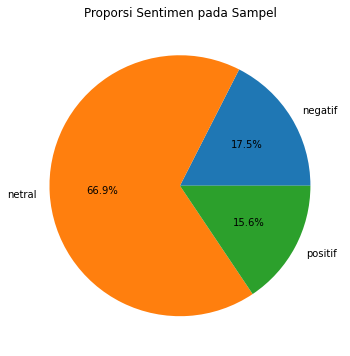

In [16]:
# Proporsi Sentimen pada Sampel 

count_sentimen = sample_model.groupby('Sentimen').size().reset_index(name='count')
count_sentimen['Sentimen'] = count_sentimen['Sentimen'].map({1: 'positif', 0: 'netral', -1:'negatif'})
count_sentimen = count_sentimen.set_index('Sentimen')

count_sentimen.plot.pie(y='count', title = 'Proporsi Sentimen pada Sampel', legend = False, 
                        autopct = '%1.1f%%', figsize = (11,6), ylabel = '')

In [17]:
# Melihat Jumlah Data Masing-masing Sentimen

sample_model.groupby('Sentimen').size()

Sentimen
-1    247
 0    944
 1    220
dtype: int64

In [18]:
# Baseline

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, C = 1.0, kernel="linear", class_weight="balanced"))

baseline = pipeline_svm.fit(X_train, y_train)

prediction_svm = pipeline_svm.predict(X_test)

In [19]:
# Metrics Evaluation Function

def results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        
    
    acc = balanced_accuracy_score(y, pred)
    f1 = f1_score(y, pred, average='weighted')
    prec = precision_score(y, pred, average='weighted')
    rec = recall_score(y, pred, average='weighted')
    result = {'accuracy': acc, 'f1': f1,  'precision': prec, 'recall': rec}
    return result

In [20]:
results(baseline, X_test, y_test)

{'accuracy': 0.6552467140702435,
 'f1': 0.7306770196255686,
 'precision': 0.730010048168827,
 'recall': 0.7314487632508834}

In [19]:
# Hyperparameter Tuning

# kfolds = StratifiedKFold(shuffle=True, random_state=42)
# pipeline = make_pipeline(vectorizer, 
#                         SVC(probability = True, kernel="linear", class_weight="balanced"))
# main_params = {"tfidfvectorizer__max_features": [1000, 2000, 3000, 4000],
#               "svc__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
#               "svc__gamma": ['scale', 'auto'],
#               "svc__decision_function_shape": ['ovo', 'ovr'],
#               "svc__random_state" : [42]}
# params_grid = [{**main_params, "svc__kernel" : ["linear", "rbf"]},
#               {**main_params, "svc__coef0" : np.arange(0, 2, 0.1), "svc__kernel" : ["poly", "sigmoid"]}]
# score = make_scorer(f1_score, average='weighted')

In [20]:
# Grid Search CV

# grid_svm = GridSearchCV(pipeline, 
#                        params_grid,
#                        cv = kfolds,
#                        scoring = score,
#                        verbose = 1,
#                        n_jobs = -1)

# grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 5376 candidates, totalling 26880 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(tokenizer=<function tokenize at 0x0000029D0798A4C0>)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear',
                                            probability=True))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                     1000],
                          'svc__decision_functi...
                                     1000],
                          'svc__coef0': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                          'svc__decision_function_shape': ['ovo', 'ovr'],
                          'svc__gamma': [

In [21]:
# grid_svm.best_score_

0.6820153837434879

In [22]:
# grid_svm.best_params_

{'svc__C': 0.1,
 'svc__coef0': 1.8,
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 'scale',
 'svc__kernel': 'poly',
 'svc__random_state': 42,
 'tfidfvectorizer__max_features': 3000}

In [23]:
# grid_svm.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=3000,
                                 tokenizer=<function tokenize at 0x0000029D0798A4C0>)),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', coef0=1.8,
                     decision_function_shape='ovo', kernel='poly',
                     probability=True, random_state=42))])

In [24]:
# gridsearch_result = pd.DataFrame(grid_svm.cv_results_)
# gridsearch_result = gridsearch_result.sort_values(by=['rank_test_score'], ascending = True)
# # gridsearch_result.to_csv(r'C:\Users\ASUS\skripsi\gridsearchcv2.csv', index=False)

In [25]:
# bestmodel = grid_svm.best_estimator_

In [27]:
# results(bestmodel, X_test, y_test)

{'accuracy': 0.6174962292609352,
 'f1': 0.7412305075501325,
 'precision': 0.7557232919060693,
 'recall': 0.7597173144876325}

In [21]:
# Best Model: Kernel Polinomial (19 Juli 2023)

best_model = make_pipeline(TfidfVectorizer(analyzer = 'word',
                                       tokenizer = tokenize,
                                       lowercase = True,
                                       ngram_range=(1, 1),
                                       max_features = 3000),
                       SVC(kernel = "poly", 
                           class_weight = "balanced",
                           decision_function_shape = "ovo",
                           probability = True,
                           coef0 = 1.8,
                           gamma = "scale",
                           random_state = 42,
                           C = 0.1)) 
best_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=3000,
                                 tokenizer=<function tokenize at 0x000001AA37D05820>)),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', coef0=1.8,
                     decision_function_shape='ovo', kernel='poly',
                     probability=True, random_state=42))])

In [22]:
results(best_model, X_test, y_test)

{'accuracy': 0.6174962292609352,
 'f1': 0.7412305075501325,
 'precision': 0.7557232919060693,
 'recall': 0.7597173144876325}

In [23]:
results(best_model, X_train, y_train)

{'accuracy': 0.9858368783708601,
 'f1': 0.9771498264502297,
 'precision': 0.9782494421084011,
 'recall': 0.9769503546099291}

In [24]:
feature_names = best_model.named_steps['tfidfvectorizer'].get_feature_names_out([X_train])

with np.printoptions(threshold=np.inf):
    print(feature_names)

['a' 'aaaaaaaaaaaaanjing' 'aaargh' 'aarrgh' 'ab' 'abang' 'abdillah'
 'absen' 'abt' 'abu' 'ac' 'academy' 'acara' 'accepted' 'account'
 'achievment' 'actually' 'adbis' 'admin' 'administrasi' 'adminnya' 'ado'
 'advance' 'advice' 'advo' 'advokasi' 'aenya' 'affiliate' 'afni' 'agaknua'
 'agraria' 'agustus' 'ahli' 'ahmad' 'ai' 'aib' 'aidah' 'aih' 'ain' 'aing'
 'air' 'ajaib' 'ajak' 'ajang' 'ajar' 'aju' 'akademik' 'akademis'
 'akademisi' 'akal' 'akang' 'akt' 'aktif' 'aktifitas' 'aktivitas' 'akuin'
 'akun' 'akuntansi' 'akwkkawk' 'al' 'alaikum' 'alam' 'alami' 'alamin'
 'alas' 'album' 'alesannya' 'alfamidi' 'alghifari' 'alhamdulilah'
 'alhamdulillah' 'alhasil' 'alias' 'alih' 'allah' 'allowed' 'alumne'
 'alumni' 'alur' 'always' 'aman' 'ambang' 'ambil' 'ameylia' 'amik' 'amin'
 'amp' 'amplop' 'ampu' 'an' 'ana' 'anak' 'analisis' 'anas' 'and' 'andai'
 'android' 'angka' 'angkat' 'anjeng' 'anjg' 'anjing' 'anjir' 'annyone'
 'another' 'antartika' 'antra' 'antusias' 'anxiety' 'any' 'anything'
 'anyway' 'apa

In [25]:
j = feature_names.tolist()
print(j)

['a', 'aaaaaaaaaaaaanjing', 'aaargh', 'aarrgh', 'ab', 'abang', 'abdillah', 'absen', 'abt', 'abu', 'ac', 'academy', 'acara', 'accepted', 'account', 'achievment', 'actually', 'adbis', 'admin', 'administrasi', 'adminnya', 'ado', 'advance', 'advice', 'advo', 'advokasi', 'aenya', 'affiliate', 'afni', 'agaknua', 'agraria', 'agustus', 'ahli', 'ahmad', 'ai', 'aib', 'aidah', 'aih', 'ain', 'aing', 'air', 'ajaib', 'ajak', 'ajang', 'ajar', 'aju', 'akademik', 'akademis', 'akademisi', 'akal', 'akang', 'akt', 'aktif', 'aktifitas', 'aktivitas', 'akuin', 'akun', 'akuntansi', 'akwkkawk', 'al', 'alaikum', 'alam', 'alami', 'alamin', 'alas', 'album', 'alesannya', 'alfamidi', 'alghifari', 'alhamdulilah', 'alhamdulillah', 'alhasil', 'alias', 'alih', 'allah', 'allowed', 'alumne', 'alumni', 'alur', 'always', 'aman', 'ambang', 'ambil', 'ameylia', 'amik', 'amin', 'amp', 'amplop', 'ampu', 'an', 'ana', 'anak', 'analisis', 'anas', 'and', 'andai', 'android', 'angka', 'angkat', 'anjeng', 'anjg', 'anjing', 'anjir', 'a

In [26]:
y_pred = best_model.predict(X_test)

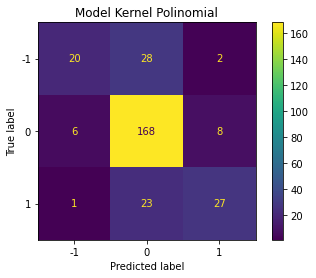

In [27]:
# Confusion Matrix Best Model: Kernel Polinomial

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Model Kernel Polinomial")
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.40      0.52        50
           0       0.77      0.92      0.84       182
           1       0.73      0.53      0.61        51

    accuracy                           0.76       283
   macro avg       0.75      0.62      0.66       283
weighted avg       0.76      0.76      0.74       283



In [29]:
best_model.named_steps['svc'].support_vectors_

<1031x2647 sparse matrix of type '<class 'numpy.float64'>'
	with 10645 stored elements in Compressed Sparse Row format>

In [115]:
# sign_function = best_model.decision_function(X_train)
# sign_function_df = pd.DataFrame(sign_function)
# # sign_function_df.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\sign_function.xlsx", index = False)

# y_train_sign = pd.DataFrame(y_train)
# # y_train_sign.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\y_train_sign.xlsx", index = False)

,0,1,2
0,-0.999900,-0.074176,0.999780
1,-1.017596,0.107958,0.999595
2,-1.000274,-0.306326,0.999886
3,0.094663,-1.000041,-0.999978
4,-0.279911,-0.999831,-1.000019
...,...,...,...
1123,-1.067977,-0.245494,0.999635
1124,-0.999905,-0.838288,0.431183
1125,-1.000009,0.257901,0.999686
1126,-0.636525,0.505594,1.000037


In [30]:
sign_function_test = best_model.decision_function(X_test)
sign_function_df_test = pd.DataFrame(sign_function_test)
# sign_function_df_test.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\sign_function_test.xlsx", index = False)

# y_pred_sign = pd.DataFrame(y_pred)
# y_pred_sign.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\y_pred_sign.xlsx", index = False)
# y_test_sign = pd.DataFrame(y_test)
# y_test_sign.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\y_test_sign.xlsx", index = False)

In [135]:
dual_coef = best_model.named_steps['svc']._dual_coef_
dual_coef = dual_coef.todense()
df_dual_coef = pd.DataFrame(dual_coef)
# df_dual_coef.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\dual_coef_.xlsx")

In [38]:
best_model.named_steps['svc'].shape_fit_

(1128, 2647)

In [50]:
features_used = pd.read_excel(r'C:\Users\ASUS\skripsi\features_used.xlsx')

In [37]:
index_sv = best_model.named_steps['svc'].support_
index_sv = index_sv.tolist()
with np.printoptions(threshold=np.inf):
    print(index_sv)

[13, 22, 26, 31, 35, 49, 51, 61, 70, 75, 76, 85, 87, 96, 103, 105, 106, 107, 112, 113, 114, 123, 126, 132, 135, 138, 146, 150, 151, 153, 155, 156, 158, 174, 180, 186, 190, 195, 196, 198, 202, 205, 213, 218, 225, 231, 234, 237, 238, 242, 243, 248, 251, 256, 265, 268, 271, 273, 274, 280, 288, 289, 291, 299, 300, 305, 320, 330, 331, 344, 359, 360, 378, 379, 380, 382, 383, 400, 405, 414, 424, 434, 443, 444, 457, 460, 461, 464, 465, 467, 471, 472, 477, 485, 494, 496, 511, 514, 516, 530, 534, 545, 551, 553, 556, 568, 586, 605, 611, 613, 615, 622, 630, 631, 633, 652, 655, 657, 661, 662, 666, 668, 670, 678, 681, 682, 701, 705, 712, 721, 722, 731, 733, 734, 743, 744, 748, 753, 767, 769, 770, 779, 788, 790, 791, 794, 812, 816, 821, 829, 832, 843, 857, 864, 870, 874, 886, 892, 893, 897, 906, 910, 921, 929, 934, 954, 966, 970, 975, 980, 981, 983, 985, 992, 1001, 1006, 1009, 1011, 1013, 1038, 1039, 1046, 1048, 1064, 1065, 1078, 1086, 1087, 1090, 1092, 1095, 1096, 1100, 1110, 1114, 1117, 1121, 0, 1,

In [71]:
df_model = features_used.loc[index_sv]

In [72]:
df_model.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\df_model.xlsx", index = False)

In [69]:
df_model

,Unnamed: 0,a,aaaaaaaaaaaaanjing,aaargh,aarrgh,ab,abang,abdillah,absen,abt,...,yt,yudisium,yuk,yukz,yupi,zaky,zen,zenius,zoom,zoomnya
13,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1104,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1107,NaN,0.0,0.0,0.401714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Model 2 : Kernel Sigmoid

model_sigmoid = make_pipeline(TfidfVectorizer(analyzer = 'word',
                                       tokenizer = tokenize,
                                       lowercase = True,
                                       ngram_range=(1, 1),
                                       max_features = 3000),
                       SVC(kernel = "sigmoid", 
                           class_weight = "balanced",
                           decision_function_shape = "ovo",
                           probability = True,
                           coef0 = 0.6,
                           gamma = "auto",
                           random_state = 42,
                           C = 1000)) 
model_sigmoid.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=3000,
                                 tokenizer=<function tokenize at 0x0000014CEAA60E50>)),
                ('svc',
                 SVC(C=1000, class_weight='balanced', coef0=0.6,
                     decision_function_shape='ovo', gamma='auto',
                     kernel='sigmoid', probability=True, random_state=42))])

In [35]:
results(model_sigmoid, X_test, y_test)

{'accuracy': 0.6645033397974575,
 'f1': 0.705436765790542,
 'precision': 0.7354012310498119,
 'recall': 0.6925795053003534}

In [36]:
results(model_sigmoid, X_train, y_train)

{'accuracy': 0.85910604061886,
 'f1': 0.8307759584274633,
 'precision': 0.8622706054897663,
 'recall': 0.8235815602836879}

In [37]:
y_pred1 = model_sigmoid.predict(X_test)

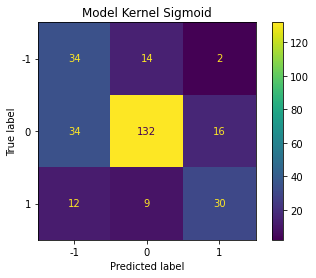

In [38]:
# Confusion Matrix Best Model: Kernel Sigmoid

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1, labels = model_sigmoid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_sigmoid.classes_)
disp.plot()
plt.title("Model Kernel Sigmoid")
plt.show()

In [39]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          -1       0.42      0.68      0.52        50
           0       0.85      0.73      0.78       182
           1       0.62      0.59      0.61        51

    accuracy                           0.69       283
   macro avg       0.63      0.66      0.64       283
weighted avg       0.74      0.69      0.71       283



In [40]:
model_sigmoid.named_steps['svc'].n_features_in_

2647

In [41]:
# Model 3 : Kernel Linear

model_linear = make_pipeline(TfidfVectorizer(analyzer = 'word',
                                       tokenizer = tokenize,
                                       lowercase = True,
                                       ngram_range=(1, 1),
                                       max_features = 3000),
                       SVC(kernel = "linear",
                           class_weight = "balanced",
                           decision_function_shape = "ovo",
                           probability = True,
                           gamma = "auto",
                           random_state = 42,
                           C = 1)) 
model_linear.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=3000,
                                 tokenizer=<function tokenize at 0x0000014CEAA60E50>)),
                ('svc',
                 SVC(C=1, class_weight='balanced',
                     decision_function_shape='ovo', gamma='auto',
                     kernel='linear', probability=True, random_state=42))])

In [42]:
results(model_linear, X_test, y_test)

{'accuracy': 0.6552467140702435,
 'f1': 0.7306770196255686,
 'precision': 0.730010048168827,
 'recall': 0.7314487632508834}

In [43]:
results(model_linear, X_train, y_train)

{'accuracy': 0.950396042203192,
 'f1': 0.9134481861647601,
 'precision': 0.9279686918730466,
 'recall': 0.9113475177304965}

In [44]:
y_pred2 = model_linear.predict(X_test)

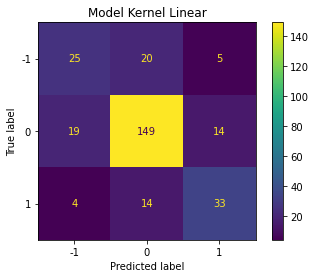

In [45]:
# Confusion Matrix Best Model: Kernel Linear

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2, labels = model_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_linear.classes_)
disp.plot()
plt.title("Model Kernel Linear")
plt.show()

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          -1       0.52      0.50      0.51        50
           0       0.81      0.82      0.82       182
           1       0.63      0.65      0.64        51

    accuracy                           0.73       283
   macro avg       0.66      0.66      0.66       283
weighted avg       0.73      0.73      0.73       283



In [47]:
model_linear.named_steps['svc'].n_features_in_

2647

In [48]:
# Model 4 : Kernel RBF

model_rbf = make_pipeline(TfidfVectorizer(analyzer = 'word',
                                       tokenizer = tokenize,
                                       lowercase = True,
                                       ngram_range=(1, 1),
                                       max_features = 1000),
                       SVC(class_weight = "balanced",
                           decision_function_shape = "ovo",
                           probability = True,
                           gamma = "scale",
                           random_state = 42,
                           C = 1)) 
model_rbf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1000,
                                 tokenizer=<function tokenize at 0x0000014CEAA60E50>)),
                ('svc',
                 SVC(C=1, class_weight='balanced',
                     decision_function_shape='ovo', probability=True,
                     random_state=42))])

In [49]:
results(model_rbf, X_test, y_test)

{'accuracy': 0.6070300940889176,
 'f1': 0.7245637588227674,
 'precision': 0.7252086609070058,
 'recall': 0.7385159010600707}

In [50]:
results(model_rbf, X_train, y_train)

{'accuracy': 0.9702620485748387,
 'f1': 0.9537483328761104,
 'precision': 0.9576306446314744,
 'recall': 0.9530141843971631}

In [51]:
y_pred3 = model_rbf.predict(X_test)

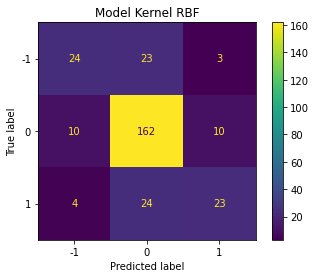

In [52]:
# Confusion Matrix Best Model: Kernel RBF

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred3, labels = model_rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rbf.classes_)
disp.plot()
plt.title("Model Kernel RBF")
plt.show()

In [53]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          -1       0.63      0.48      0.55        50
           0       0.78      0.89      0.83       182
           1       0.64      0.45      0.53        51

    accuracy                           0.74       283
   macro avg       0.68      0.61      0.63       283
weighted avg       0.73      0.74      0.72       283



In [54]:
model_rbf.named_steps['svc'].n_features_in_

1000

In [ ]:
# # Model 1

# model1 = make_pipeline(TfidfVectorizer(analyzer = 'word',
#                                        tokenizer = tokenize,
#                                        lowercase = True,
#                                        ngram_range=(1, 1),
#                                        max_features = 3000),
#                        SVC(kernel = "poly", 
#                            class_weight = "balanced",
#                            decision_function_shape = "ovo",
#                            probability = True,
#                            coef0 = 1.7000000000000002,
#                            gamma = "scale",
#                            random_state = 42,
#                            C = 1000)) 
# model1.fit(X_train, y_train)

In [ ]:
# results(model1, X_test, y_test)

In [ ]:
# results(model1, X_train, y_train)

In [ ]:
# ypred = model1.predict(X_test)

In [ ]:
# # Confusion Matrix Model 1

# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, ypred, labels = model1.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
# disp.plot()
# plt.title("Model Kernel Polinomial")
# plt.show()

In [ ]:
# print(classification_report(y_test, ypred))

In [ ]:
# Model 2

# model2 = make_pipeline(TfidfVectorizer(analyzer = 'word',
#                                        tokenizer = tokenize,
#                                        lowercase = True,
#                                        ngram_range=(1, 1),
#                                        max_features = 3000),
#                        SVC(kernel = "linear", 
#                            class_weight = "balanced",
#                            decision_function_shape = "ovo",
#                            probability = True)) 
# model2.fit(X_train, y_train)

In [ ]:
# results(model2, X_test, y_test)

In [ ]:
# results(model2, X_train, y_train)

In [ ]:
# # Confusion Matrix Model 2

# ypred2 = model2.predict(X_test)
# cm = confusion_matrix(y_test, ypred2, labels = model2.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
# disp.plot()
# plt.title("Model Kernel Linear")
# plt.show()

In [ ]:
# print(classification_report(y_test, ypred2))

In [ ]:
aa = model2.named_steps['svc'].support_vectors_
print(aa)

# Klasifikasi dengan Model SVM Kernel Linear

In [83]:
dfreal = pd.read_csv(r'C:\Users\ASUS\skripsi\df_preprocessed.csv')

In [84]:
dfreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           10569 non-null  object
 1   link           10569 non-null  object
 2   username       10569 non-null  object
 3   tweet          10569 non-null  object
 4   like           10569 non-null  int64 
 5   retweet        10569 non-null  int64 
 6   reply          10569 non-null  int64 
 7   qrt            10569 non-null  int64 
 8   cleansing      10556 non-null  object
 9   normalization  10556 non-null  object
 10  stemmed        10556 non-null  object
 11  tokenized      10569 non-null  object
 12  filtered       10569 non-null  object
 13  preprocessed   10554 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [85]:
df = pd.read_csv(r'C:\Users\ASUS\skripsi\df_preprocessed.csv')

In [88]:
df = df.drop(df[df['preprocessed'].isnull()].index)

In [90]:
X_all = df['preprocessed'].values

In [91]:
y_all = best_model.predict(X_all)

In [ ]:
df['label'] = y_all.tolist()

In [ ]:
df

In [ ]:
def sentiment(label):
  if label == 1:
    return "Positif"
  elif label == 0:
    return "Netral"
  else:
    return "Negatif"

df["sentimen"] = df["label"].apply(lambda label: sentiment(label))
df

In [ ]:
# df.to_csv(r'C:\Users\ASUS\skripsi\df_classified_updated.csv')

In [92]:
# sign_function_all = best_model.decision_function(X_all)
# sign_function_all = pd.DataFrame(sign_function_all)
# sign_function_all.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\sign_function_all.xlsx", index = False)

# y_all_sign = pd.DataFrame(y_all)
# y_all_sign.to_excel(excel_writer = r"C:\Users\ASUS\skripsi\y_all_sign.xlsx", index = False)